# Using the smallest number of queries to achieve 90% accuracy on the MNIST dataset

@author:Chaoxiang  Ye, Shan Luo 
    
    11.05.2021

note: For this problem, the labeled data obtained from each round of query is trained for 10 epochs, up to 60 rounds of the query. Each query can get 50 labeled data.
            RandomSampling is the baseline. MarginSampling and MarginSamplingDropout are our methods.


In [7]:
import numpy as np
from dataset import get_dataset, get_handler
from model import get_net
from torchvision import transforms
import torch
from method import RandomSampling, MarginSampling, MarginSamplingDropout
import matplotlib.pyplot as plt

In [8]:
# parameters
SEED = 1

NUM_INIT_LB = 0 #initial unlabeled numbers
NUM_QUERY = 50 #number of labeled per query
NUM_ROUND = 60 #query round

DATA_NAME = 'MNIST'

args_pool = {'MNIST':
                {'n_epoch': 10, 'transform': transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]),
                 'loader_tr_args':{'batch_size': 64, 'num_workers': 1},
                 'loader_te_args':{'batch_size': 10000, 'num_workers': 1},
                 'optimizer_args':{'lr': 0.01, 'momentum': 0.5}}}

args = args_pool[DATA_NAME]

In [9]:
# set seed
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.enabled = False

In [10]:
# load dataset
X_tr, Y_tr, X_te, Y_te = get_dataset(DATA_NAME)

In [11]:
# start experiment
n_pool = len(Y_tr)
n_test = len(Y_te)
print('number of labeled pool: {}'.format(NUM_INIT_LB))
print('number of unlabeled pool: {}'.format(n_pool - NUM_INIT_LB))
print('number of testing pool: {}'.format(n_test))

number of labeled pool: 0
number of unlabeled pool: 60000
number of testing pool: 10000


## Random Sampling

In [12]:
# generate initial labeled pool
idxs_lb = np.zeros(n_pool, dtype=bool)
idxs_tmp = np.arange(n_pool)
np.random.shuffle(idxs_tmp)
idxs_lb[idxs_tmp[:NUM_INIT_LB]] = True

# load network
net = get_net(DATA_NAME)
handler = get_handler(DATA_NAME)

strategy = RandomSampling(X_tr, Y_tr, idxs_lb, net, handler, args)

# round 0 accuracy
strategy.train()
P = strategy.predict(X_te, Y_te)
acc_rs = np.zeros(NUM_ROUND+1)
acc_rs[0] = 1.0 * (Y_te==P).sum().item() / len(Y_te)
print('Round 0\ntesting accuracy {}'.format(acc_rs[0]))

for rd in range(1, NUM_ROUND+1):
    print('Round {}'.format(rd))

    # query
    q_idxs = strategy.query(NUM_QUERY)
    idxs_lb[q_idxs] = True

    # update
    strategy.update(idxs_lb)
    strategy.train()

    # round accuracy
    P = strategy.predict(X_te, Y_te)
    acc_rs[rd] = 1.0 * (Y_te==P).sum().item() / len(Y_te)
    print('testing accuracy {}'.format(acc_rs[rd]))

# print results
print('SEED {}'.format(SEED))
print(type(strategy).__name__)
print(acc_rs)

Round 0
testing accuracy 0.1137
Round 1
testing accuracy 0.1705
Round 2
testing accuracy 0.1427
Round 3
testing accuracy 0.3317
Round 4
testing accuracy 0.2703
Round 5
testing accuracy 0.1913
Round 6
testing accuracy 0.2724
Round 7
testing accuracy 0.2157
Round 8
testing accuracy 0.4223
Round 9
testing accuracy 0.4288
Round 10
testing accuracy 0.439
Round 11
testing accuracy 0.5856
Round 12
testing accuracy 0.5653
Round 13
testing accuracy 0.5713
Round 14
testing accuracy 0.6655
Round 15
testing accuracy 0.6464
Round 16
testing accuracy 0.6846
Round 17
testing accuracy 0.7288
Round 18
testing accuracy 0.7094
Round 19
testing accuracy 0.7414
Round 20
testing accuracy 0.7268
Round 21
testing accuracy 0.7623
Round 22
testing accuracy 0.8172
Round 23
testing accuracy 0.8274
Round 24
testing accuracy 0.7628
Round 25
testing accuracy 0.8166
Round 26
testing accuracy 0.7575
Round 27
testing accuracy 0.7783
Round 28
testing accuracy 0.8372
Round 29
testing accuracy 0.774
Round 30
testing accur

## Margin Sampling

In [13]:
# generate initial labeled pool
idxs_lb = np.zeros(n_pool, dtype=bool)
idxs_tmp = np.arange(n_pool)
np.random.shuffle(idxs_tmp)
idxs_lb[idxs_tmp[:NUM_INIT_LB]] = True

# load network
net = get_net(DATA_NAME)
handler = get_handler(DATA_NAME)

strategy = MarginSampling(X_tr, Y_tr, idxs_lb, net, handler, args)

# round 0 accuracy
strategy.train()
P = strategy.predict(X_te, Y_te)
acc_ms = np.zeros(NUM_ROUND+1)
acc_ms[0] = 1.0 * (Y_te==P).sum().item() / len(Y_te)
print('Round 0\ntesting accuracy {}'.format(acc_ms[0]))

for rd in range(1, NUM_ROUND+1):
    print('Round {}'.format(rd))

    # query
    q_idxs = strategy.query(NUM_QUERY)
    idxs_lb[q_idxs] = True

    # update
    strategy.update(idxs_lb)
    strategy.train()

    # round accuracy
    P = strategy.predict(X_te, Y_te)
    acc_ms[rd] = 1.0 * (Y_te==P).sum().item() / len(Y_te)
    print('testing accuracy {}'.format(acc_ms[rd]))

# print results
print('SEED {}'.format(SEED))
print(type(strategy).__name__)
print(acc_ms)

Round 0
testing accuracy 0.13
Round 1
testing accuracy 0.1284
Round 2
testing accuracy 0.1897
Round 3
testing accuracy 0.2913
Round 4
testing accuracy 0.1846
Round 5
testing accuracy 0.1307
Round 6
testing accuracy 0.3027
Round 7
testing accuracy 0.2799
Round 8
testing accuracy 0.2788
Round 9
testing accuracy 0.3661
Round 10
testing accuracy 0.604
Round 11
testing accuracy 0.6024
Round 12
testing accuracy 0.572
Round 13
testing accuracy 0.7027
Round 14
testing accuracy 0.5336
Round 15
testing accuracy 0.7522
Round 16
testing accuracy 0.6316
Round 17
testing accuracy 0.6986
Round 18
testing accuracy 0.6726
Round 19
testing accuracy 0.7649
Round 20
testing accuracy 0.7671
Round 21
testing accuracy 0.7334
Round 22
testing accuracy 0.7844
Round 23
testing accuracy 0.8091
Round 24
testing accuracy 0.8306
Round 25
testing accuracy 0.7807
Round 26
testing accuracy 0.8617
Round 27
testing accuracy 0.821
Round 28
testing accuracy 0.8516
Round 29
testing accuracy 0.8607
Round 30
testing accuracy

## Margin Sampling Dropout

In [14]:
# generate initial labeled pool
idxs_lb = np.zeros(n_pool, dtype=bool)
idxs_tmp = np.arange(n_pool)
np.random.shuffle(idxs_tmp)
idxs_lb[idxs_tmp[:NUM_INIT_LB]] = True

# load network
net = get_net(DATA_NAME)
handler = get_handler(DATA_NAME)

strategy = MarginSamplingDropout(X_tr, Y_tr, idxs_lb, net, handler, args, n_drop=10)

# round 0 accuracy
strategy.train()
P = strategy.predict(X_te, Y_te)
acc_ms_drop = np.zeros(NUM_ROUND+1)
acc_ms_drop[0] = 1.0 * (Y_te==P).sum().item() / len(Y_te)
print('Round 0\ntesting accuracy {}'.format(acc_ms_drop[0]))

for rd in range(1, NUM_ROUND+1):
    print('Round {}'.format(rd))

    # query
    q_idxs = strategy.query(NUM_QUERY)
    idxs_lb[q_idxs] = True

    # update
    strategy.update(idxs_lb)
    strategy.train()

    # round accuracy
    P = strategy.predict(X_te, Y_te)
    acc_ms_drop[rd] = 1.0 * (Y_te==P).sum().item() / len(Y_te)
    print('testing accuracy {}'.format(acc_ms_drop[rd]))
# print results
print('SEED {}'.format(SEED))
print(type(strategy).__name__)
print(acc_ms_drop)

Round 0
testing accuracy 0.1024
Round 1
n_drop 1/10
n_drop 2/10
n_drop 3/10
n_drop 4/10
n_drop 5/10
n_drop 6/10
n_drop 7/10
n_drop 8/10
n_drop 9/10
n_drop 10/10
testing accuracy 0.0974
Round 2
n_drop 1/10
n_drop 2/10
n_drop 3/10
n_drop 4/10
n_drop 5/10
n_drop 6/10
n_drop 7/10
n_drop 8/10
n_drop 9/10
n_drop 10/10
testing accuracy 0.1459
Round 3
n_drop 1/10
n_drop 2/10
n_drop 3/10
n_drop 4/10
n_drop 5/10
n_drop 6/10
n_drop 7/10
n_drop 8/10
n_drop 9/10
n_drop 10/10
testing accuracy 0.1719
Round 4
n_drop 1/10
n_drop 2/10
n_drop 3/10
n_drop 4/10
n_drop 5/10
n_drop 6/10
n_drop 7/10
n_drop 8/10
n_drop 9/10
n_drop 10/10
testing accuracy 0.2535
Round 5
n_drop 1/10
n_drop 2/10
n_drop 3/10
n_drop 4/10
n_drop 5/10
n_drop 6/10
n_drop 7/10
n_drop 8/10
n_drop 9/10
n_drop 10/10
testing accuracy 0.2298
Round 6
n_drop 1/10
n_drop 2/10
n_drop 3/10
n_drop 4/10
n_drop 5/10
n_drop 6/10
n_drop 7/10
n_drop 8/10
n_drop 9/10
n_drop 10/10
testing accuracy 0.3928
Round 7
n_drop 1/10
n_drop 2/10
n_drop 3/10
n_drop

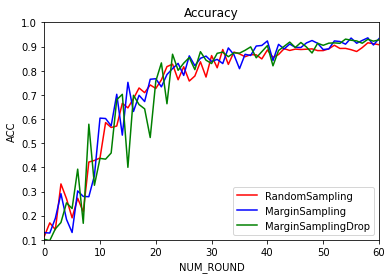

In [15]:
plt.plot(acc_rs, 'r', label="RandomSampling")
plt.plot(acc_ms, 'b', label="MarginSampling")
plt.plot(acc_ms_drop, 'g', label="MarginSamplingDrop")
plt.legend(loc = 0)
plt.xlabel('NUM_ROUND')
plt.ylabel('ACC')
plt.xlim(0, NUM_ROUND)
plt.ylim(0.1,1)
plt.title("Accuracy")    
plt.show()

## Discussion

As we can see, using the randomsampling method requires 52 queries to achieve 90% accuracy and stabilize after the 58th query. Using MarginSampling method can achieve 90% accuracy at the 38th query. In addition, the accuracy can be stable higher than 90% in subsequent rounds. Using MarginSamplingDropout method can achieve 90% accuracy at the 40th query. However, MarginSamplingDropout is more stable than MarginSampling. In a word, MarginSampling can achieve the accuracy we need 20 rounds in advance.